In [1]:
import pandas as pd
import numpy as np

In [44]:
np.random.seed(123)
df = pd.DataFrame(dict(v1 = np.random.rand(100),
                       v2 = np.random.rand(100),
                       v3 = np.random.rand(100)))
df.corr(method = "pearson") # correlation coefficient matrix(상관 계수 행렬)

In [45]:
# df.plot.scatter(x = "v1", y = "v2")

In [ ]:
df.corr(method = "spearman")

In [49]:
from scipy.stats import pearsonr, spearmanr, kendalltau

In [50]:
pearsonr(df["v1"], df["v2"])

PearsonRResult(statistic=-0.09270195576139686, pvalue=0.35896347197965783)

In [51]:
stat, p = pearsonr(df["v1"], df["v2"])
stat, p

(-0.09270195576139686, 0.35896347197965783)

df객체의 "v1"변수와 "v2"변수에 대해 피어슨 상관분석을 실시.  
그 결과 상관계수는 -0.09이고 p-value는 0.36로 산출되었다.  
여기서 유의수준 5%기준으로 검정결과를 해석하는 경우 산출된 p-value가 0.05보다 크기 때문에 귀무가설을 기각하지 못하여 두 변수간 유의미한 상관관계가 있다고 보기 어렵다.  
즉, 두 집단(변수)간 상관관계(직선적 관계)는 없다.

In [ ]:
df_dia = pd.read_csv("data_diamonds.csv")
df_dia.head(2)

In [ ]:
df_dia.corr(numeric_only = True).round(2)

In [ ]:
df_dia.plot.scatter(x = "carat", y = "price", alpha = 0.2)

In [62]:
stat, p = pearsonr(df_dia["carat"], df_dia["price"])
stat, p

(0.9215913011934767, 0.0)

df_dia객체의 "carat"변수와 "price"변수에 대해 피어슨 상관분석을 실시.  
그 결과 상관계수는 0.92이고 p-value는 0.0로 산출되었다.  
여기서 유의수준 5%기준으로 검정결과를 해석하는 경우 산출된 p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택하여 두 변수간 유의미한 상관관계가 있다고 할 수 있다.
즉, 두 집단(변수)간 직선적 관계가 존재한다고 할 수 있다.

In [63]:
from scipy.stats import ks_2samp

In [64]:
np.random.seed(123)
arr_1 = np.random.normal(0, 1, 1000)
arr_2 = np.random.normal(0, 1, 1000)

In [68]:
arr_1.mean(), arr_1.std()

(-0.03956413608079184, 1.0007875375162334)

<Axes: ylabel='Frequency'>

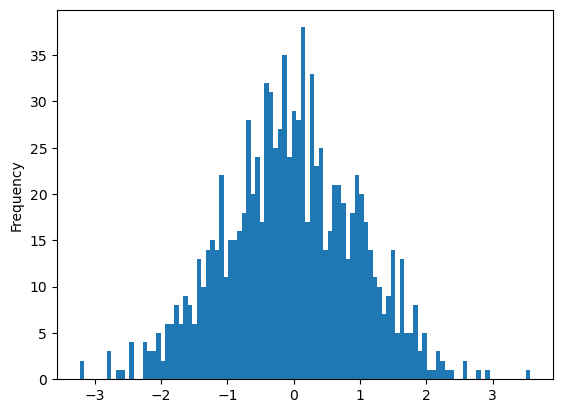

In [72]:
pd.Series(arr_1).plot.hist(bins = 100)

In [65]:
stat, p = ks_2samp(arr_1, arr_2)
stat, p # 검정통계량, p-value

(0.058, 0.06917625399020766)

* 여기서 검정통계량은 p-value를 산출하기위한 통계량이며 실무에서는 p-value만 신경써도 됨

arr_1 객체와 arr_2객체에 있는 데이터의 분포가 서로 유의미하게 차이가 나는지(즉, 서로 다른지) 그렇지 않은지 알아보기위해 KS 2표본 검정을 실시함. 여기서 p-value가 0.069로 산출되었고, 유의수준 5% 기준으로 검정 할 때 귀무가설을 기각하지 못함. 즉, 두 집단간(arr_1 객체의 데이터, arr_2 객체의 데이터) 분포가 유의미하게 차이가 난다고 보기 어렵다.

In [75]:
np.random.seed(123)
arr_3 = np.random.uniform(size = 1000)

In [76]:
stat, p = ks_2samp(arr_1, arr_3)
p # p-value < 0.05, 두 집단 분포가 상이함.

9.362959411907602e-124

In [ ]:
!pip install statsmodels

In [77]:
from statsmodels.stats.proportion import proportions_ztest

In [78]:
n_1 = 100 # 첫번째 집단의 시행 횟수
n_2 = 200 # 두번째 집단의 시행 횟수
s_cnt_1 = 8 # 첫번째 집단의 성공 횟수
s_cnt_2 = 30 # 두번째 집단의 성공 횟수
val_prop = 0.05 # 1표본 비율검정시 비교 대상이 되는 비율(모비율)

In [83]:
stat, p = proportions_ztest(s_cnt_1, n_1, val_prop) # 1표본 비율검정
stat, p

(1.1058146711617285, 0.2688067435476653)

합격률이 5%라고 알려진 데이터분석 자격검정이 있을 때 1기 프로그램에 참여한 학생이 100명이고 그 중 8명이 합격을 했다면, 합격률을 8% 이다. 그런데 8%라는 합격률이 5%와 유의하게 차이가 나는지 검정하기 위해 z비율검정을 실시했고 p-value가 0.2688로 유의수준 5% 기준으로 검정하는 경우 귀무가설을 기각하지 못하였다. 즉, 합격률이 3% 증가했지만 이는 통계적으로 유의미하게 증가했다고 보기 어렵다.

https://product.kyobobook.co.kr/detail/S000000561988

In [84]:
s_cnt_1 / n_1, s_cnt_2 / n_2 # 두 개의 비율이 통계적으로 유의미하게 차이나는지 보는 것
# 아래의 2표본 비율검정

(0.08, 0.15)

In [85]:
stat, p = proportions_ztest([s_cnt_1, n_1], [s_cnt_2, n_2]) # 2표본 비율검정
print(stat, p)

-2.3879461858341764 0.016942822475058857


p-value가 0.0169로 유의수준 5%기준으로 검정시 p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택하여 두 집단간 비율이 유의미하게 다르다고 할 수 있음.

$$\mu - \bar{X} = 0$$
$$\mu = \bar{X}$$

In [86]:
df_dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [87]:
df_dia["carat"].mean()

0.7979397478680014

In [88]:
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

In [91]:
# stat1, p1 = ttest_1samp(df_dia["carat"].mean(), popmean = 0.7979) 
stat1, p1 = ttest_1samp(df_dia["carat"], popmean = 0.7979) 
stat1, p1 # 0.7979와 유의미하게 차이가 난다고 보기 어려움

(0.01947514347824723, 0.9844621379475148)

In [92]:
stat1, p1 = ttest_1samp(df_dia["carat"], popmean = 2) 
stat1, p1 # 2와 차이가 유의미 하게 남

(-588.969850634339, 0.0)

In [94]:
df_sub1 = df_dia.loc[df_dia["color"] == "H", ]
df_sub2 = df_dia.loc[df_dia["color"] == "F", ]
stat2, p2 = ttest_ind(df_sub1["price"], df_sub2["price"])
stat2, p2

(12.717698041559935, 6.81861206715393e-37)

In [95]:
df_sub1["price"].mean(), df_sub2["price"].mean()

(4486.669195568401, 3724.886396981765)

색상이 H인 다이아몬드의 가격 평균(4486)과 색상이 F인 다이아몬드의 가격 평균(3724)의 평균이 유의미하게 차이나는지 독립표본 t검정을 사용하여 검정을 실시하였고 p-value가 $6.81 \times 10^{-37}$ 으로 0이나 다름없음 그러므로 두 집단의 평균은 유의미하게 차이난다고 할 수 있음. 